In [1]:
import pandas as pd
import glob

In [2]:
csv_directory = "./fraud_data_analysis_data/"

In [3]:
# Get a list of all CSV files in the directory
csv_files = glob.glob(csv_directory + "*.csv")

In [4]:
# Dictionary to store the dataframes
dataframes_dict = {}

In [5]:
# Read each CSV file and store in a separate variable
for file_name in csv_files:
    print(file_name)

./fraud_data_analysis_data/Train_Outpatientdata-1542865627584.csv
./fraud_data_analysis_data/Train_Beneficiarydata-1542865627584.csv
./fraud_data_analysis_data/Test_Beneficiarydata-1542969243754.csv
./fraud_data_analysis_data/Test_Inpatientdata-1542969243754.csv
./fraud_data_analysis_data/Test-1542969243754.csv
./fraud_data_analysis_data/Train_Inpatientdata-1542865627584.csv
./fraud_data_analysis_data/Test_Outpatientdata-1542969243754.csv
./fraud_data_analysis_data/Train-1542865627584.csv


In [6]:
# Iterate over each CSV file and read it into a dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes_dict[csv_file] = df

    # Concatenate all the dataframes into a single dataframe
# combined_df = pd.concat(dataframes)

In [7]:
train_outpatient_df = dataframes_dict['./fraud_data_analysis_data/Train_Outpatientdata-1542865627584.csv']
train_outpatient_df.head()
train_outpatient_df.shape

(517737, 27)

In [8]:
train_inpatient_df = dataframes_dict['./fraud_data_analysis_data/Train_Inpatientdata-1542865627584.csv']
train_inpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [9]:
train_beneficiary_df = dataframes_dict['./fraud_data_analysis_data/Train_Beneficiarydata-1542865627584.csv']
train_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [10]:
train_df = dataframes_dict['./fraud_data_analysis_data/Train-1542865627584.csv']
train_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


### Feature Engineering
#### Adding the Admitted or Not Admitted indicator in IP and OP Dataset

In [15]:
train_inpatient_df['Admitted?'] = 1
train_inpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [16]:
train_outpatient_df['Admitted?'] = 0
train_outpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


# Get Dates

In [17]:
# Get month and year from ClaimStartDt ClaimEndDt
def get_month_year(dataframe):
    
    # Create a new DataFrame
    new_df = pd.DataFrame()

    # Convert the 'dataframe column' to datetime
    dataframe = pd.to_datetime(dataframe)

    # Extract month and year
    new_df['Year'] = dataframe.dt.year
    new_df['Month'] = dataframe.dt.month
    
    return new_df

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Inpatient - Claim start and end date


In [18]:
in_start_date_col = get_month_year(train_inpatient_df['ClaimStartDt'])

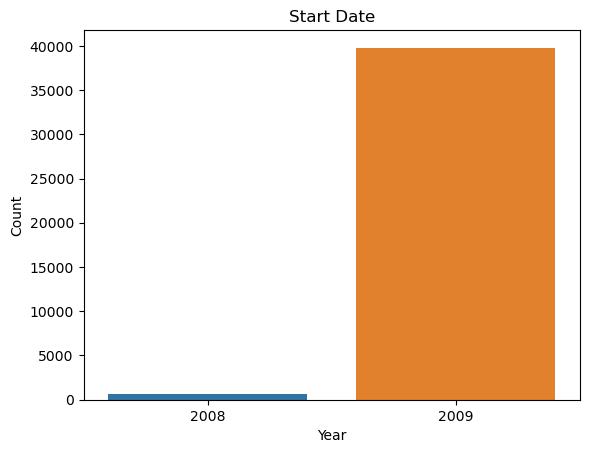

In [19]:
# Calculate the value counts of 'Year'
year_counts = in_start_date_col['Year'].value_counts()

# Plot the value counts using seaborn barplot
sns.barplot(x=year_counts.index, y=year_counts.values)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Start Date')

# Display the plot
plt.show()

In [21]:
in_end_date_col = get_month_year(train_inpatient_df['ClaimEndDt'])
in_end_date_col.head()

,Year,Month
0,2009,4
1,2009,9
2,2009,9
3,2009,2
4,2009,8


In [20]:
# Calculate the value counts of 'Year'
year_counts = in_end_date_col['Year'].value_counts()

# Plot the value counts using seaborn barplot
sns.barplot(x=year_counts.index, y=year_counts.values)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('End Date')

# Display the plot
plt.show()

NameError: name 'in_end_date_col' is not defined

<AxesSubplot:xlabel='Month', ylabel='count'>

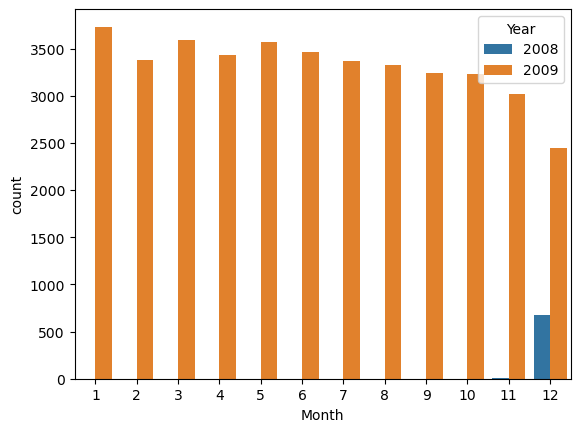

In [19]:
sns.countplot(data=in_start_date_col, x='Month', hue='Year')

In [21]:
sns.countplot(data=in_end_date_col, x='Month', hue='Year')

NameError: name 'in_end_date_col' is not defined

<AxesSubplot:xlabel='Month', ylabel='Year'>

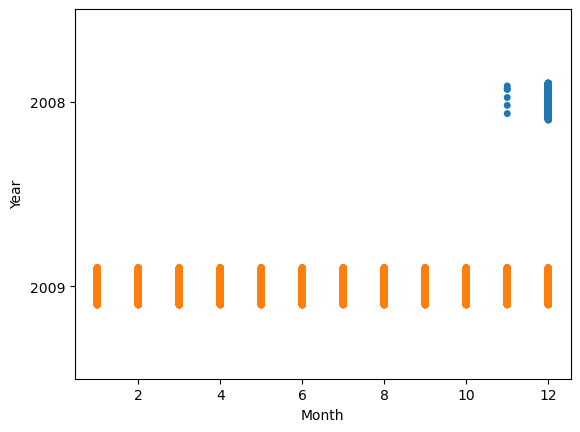

In [23]:
sns.stripplot(data=in_start_date_col, x='Month', y='Year', orient = 'h')

<AxesSubplot:xlabel='Month', ylabel='Year'>

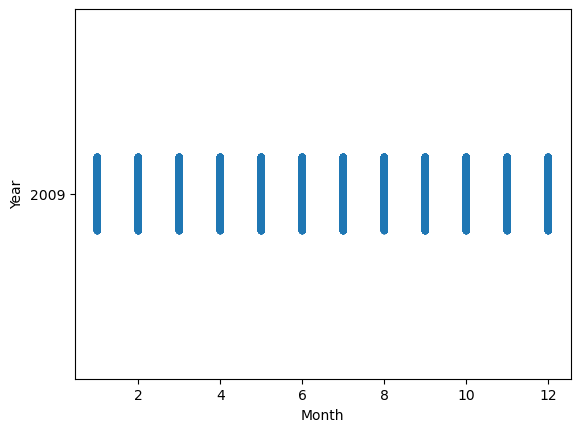

In [24]:
sns.stripplot(data=in_end_date_col, x='Month', y='Year', orient = 'h')

Observation:

### Outpatient - Claim start and end date


In [22]:
out_start_date_col = get_month_year(train_outpatient_df['ClaimStartDt'])
out_start_date_col

,Year,Month
0,2009,10
1,2009,2
2,2009,6
3,2009,1
4,2009,1
...,...,...
517732,2009,8
517733,2009,8
517734,2009,9
517735,2009,10


In [26]:
out_start_date_col

,Year,Month
0,2009,10
1,2009,2
2,2009,6
3,2009,1
4,2009,1
...,...,...
517732,2009,8
517733,2009,8
517734,2009,9
517735,2009,10


In [27]:
out_start_date_col.shape

(517737, 2)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

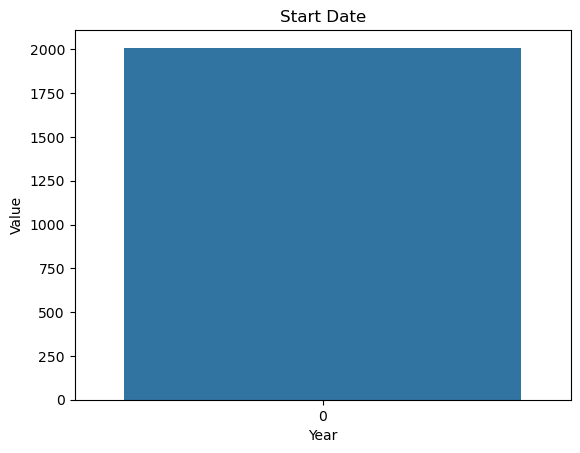

In [24]:
# Plot the DataFrame with seaborn barplot
sns.barplot(data=out_start_date_col['Year'])


# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Start Date')

# Display the plot
plt.show()

In [30]:
out_end_date_col = get_month_year(train_outpatient_df['ClaimEndDt'])
out_end_date_col.head(10)

,Year,Month
0,2009,10
1,2009,2
2,2009,6
3,2009,1
4,2009,1
5,2009,2
6,2009,3
7,2009,3
8,2009,5
9,2009,5


In [ ]:
out_end_date_col = get_month_year(train_outpatient_df['ClaimEndDt'])
out_end_date_col.plot(kind='bar',title='End date')

KeyboardInterrupt: 

# Physicians

# Inpatient
## Inpatient - Attending Physician

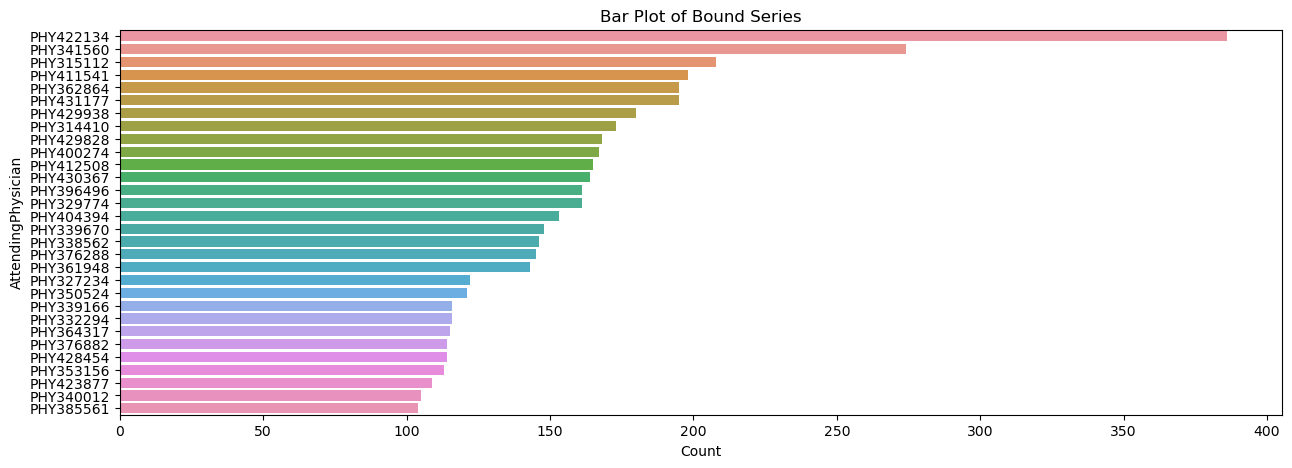

In [29]:
ap_df = train_inpatient_df.AttendingPhysician.value_counts().head(30)
# ap_df

plt.figure(figsize=(15, 5))
sns.barplot(x=ap_df.values, y=ap_df.index, orient='h')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('AttendingPhysician')
plt.title('Bar Plot of Bound Series')

# Display the plot
plt.show()

Observation:

Most patient are attended by physician **PHY422134**

## Inpatient - Operating Physician

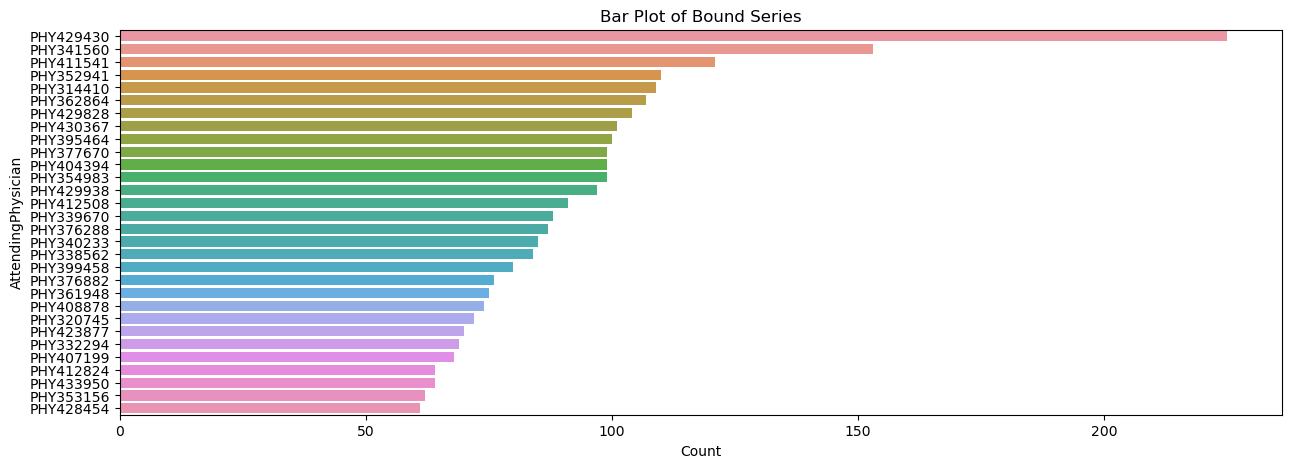

In [30]:
ap_df = train_inpatient_df.OperatingPhysician.value_counts().head(30)
# ap_df

plt.figure(figsize=(15, 5))
sns.barplot(x=ap_df.values, y=ap_df.index, orient='h')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('AttendingPhysician')
plt.title('Bar Plot of Bound Series')

# Display the plot
plt.show()

Observation:

Most patient are operated by physician **PHY429430**

## Inpatient - Other Physician

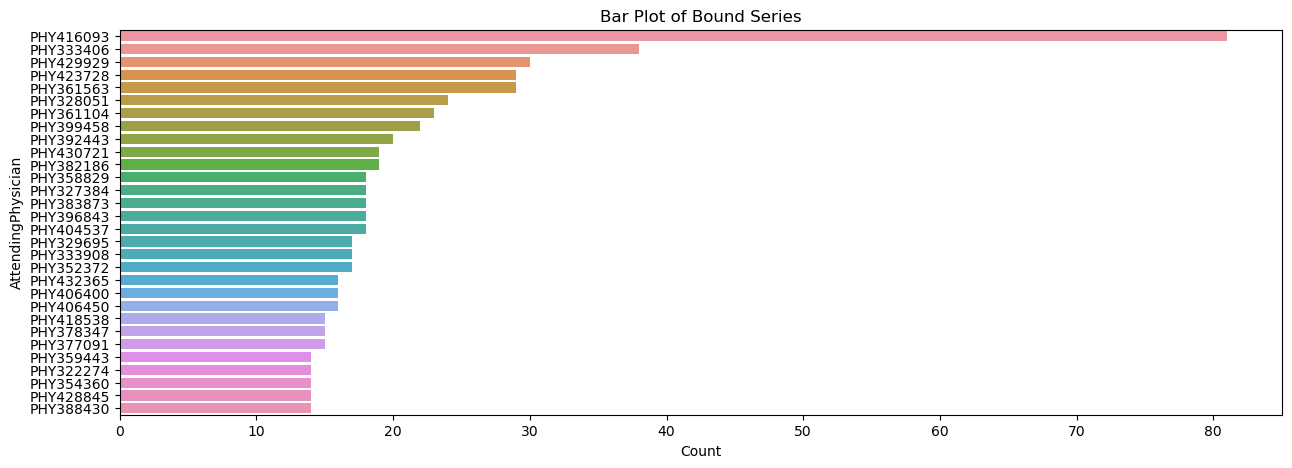

In [31]:
ap_df = train_inpatient_df.OtherPhysician.value_counts().head(30)
# ap_df

plt.figure(figsize=(15, 5))
sns.barplot(x=ap_df.values, y=ap_df.index, orient='h')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('AttendingPhysician')
plt.title('Bar Plot of Bound Series')

# Display the plot
plt.show()

Observation:

Other physician **PHY416093**

# Outpatient

## Outpatient - Attending Physician

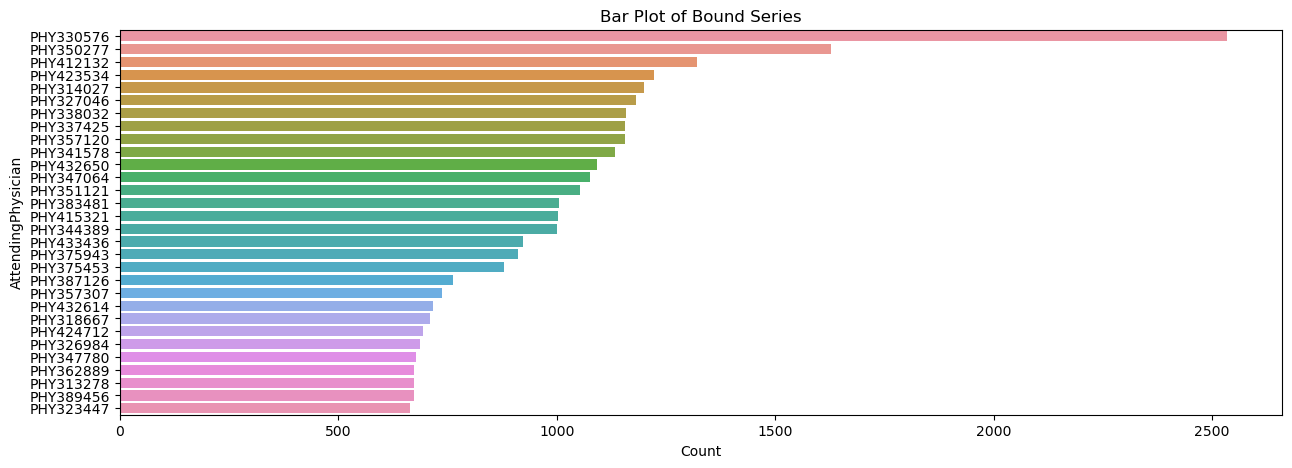

In [32]:
ap_df = train_outpatient_df.AttendingPhysician.value_counts().head(30)
# ap_df

plt.figure(figsize=(15, 5))
sns.barplot(x=ap_df.values, y=ap_df.index, orient='h')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('AttendingPhysician')
plt.title('Bar Plot of Bound Series')

# Display the plot
plt.show()

Most patinets are attended by pyhisican **PHY330576**.

## Outpatient - Operating Physician

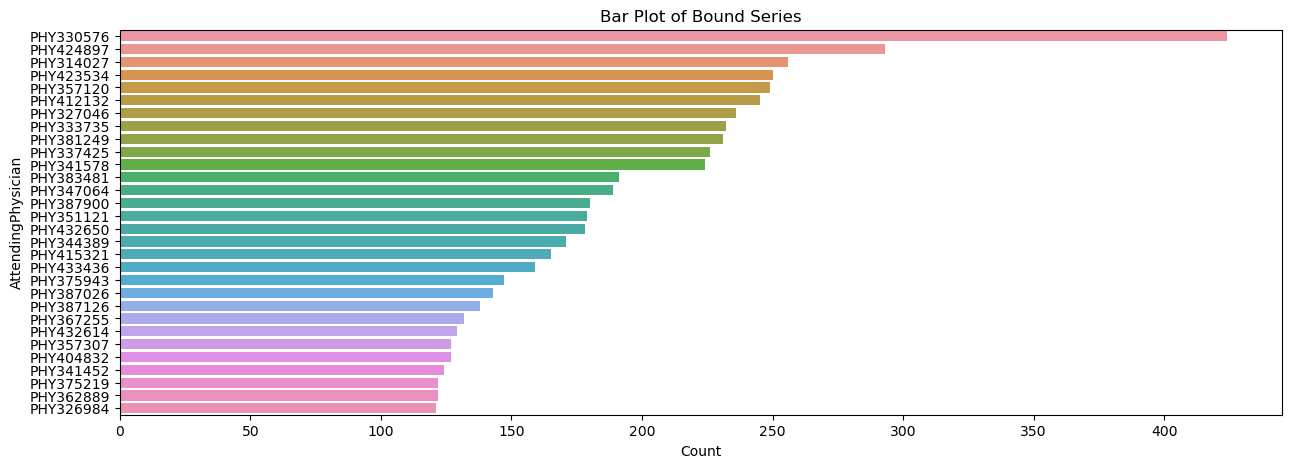

In [33]:
ap_df = train_outpatient_df.OperatingPhysician.value_counts().head(30)
# ap_df

plt.figure(figsize=(15, 5))
sns.barplot(x=ap_df.values, y=ap_df.index, orient='h')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('AttendingPhysician')
plt.title('Bar Plot of Bound Series')

# Display the plot
plt.show()

Pyhisican **PHY330576** perfoms the most of the operations.

## Outpatient - Other Physician

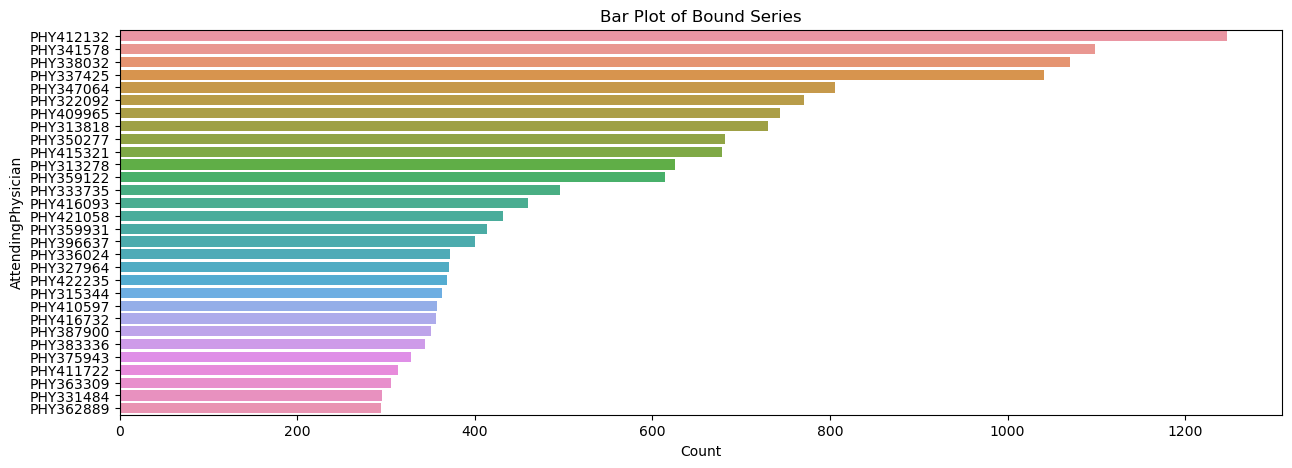

In [34]:
ap_df = train_outpatient_df.OtherPhysician.value_counts().head(30)
# ap_df

plt.figure(figsize=(15, 5))
sns.barplot(x=ap_df.values, y=ap_df.index, orient='h')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('AttendingPhysician')
plt.title('Bar Plot of Bound Series')

# Display the plot
plt.show()

Pyhisican **PHY412132** is other physician for a patient

# Claim Amount Reimbursed

## Inpatient

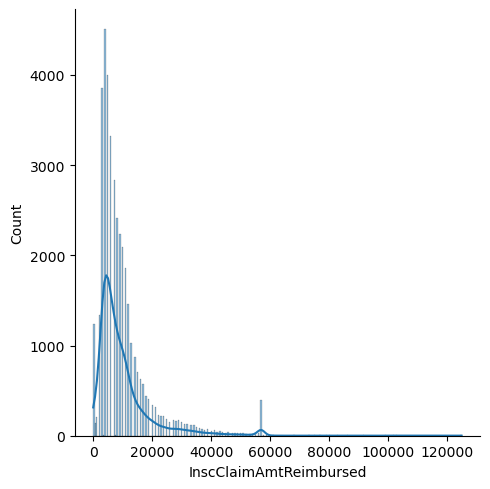

In [35]:
# Add a vertical line at a specific position

sns.displot(train_inpatient_df.InscClaimAmtReimbursed, kde=True)

Observation:

- All most all Reimbursed ammount is between 0 and 20000

- In very few cases amount more than 20000 is paid for claim reimbursement

## Outpatient

In [17]:
provider_fraud_df = dataframes_dict['./fraud_data_analysis_data/Train-1542865627584.csv']
provider_fraud_df

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [18]:
only_fraud_provider = provider_fraud_df[provider_fraud_df['PotentialFraud'] == 'Yes']
only_fraud_provider

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes
...,...,...
5307,PRV57642,Yes
5324,PRV57667,Yes
5329,PRV57672,Yes
5351,PRV57697,Yes


In [20]:
outpatient_fraud_provider_df = pd.merge(train_outpatient_df, only_fraud_provider, how="inner", on='Provider')
outpatient_fraud_provider_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189389,BENE144674,CLM478399,2009-07-19,2009-07-19,PRV56012,200,PHY349406,NaN,NaN,72401,...,NaN,NaN,NaN,NaN,NaN,NaN,0,7242,0,Yes
189390,BENE158989,CLM204673,2009-02-19,2009-02-20,PRV56012,90,PHY427933,NaN,NaN,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
189391,BENE111157,CLM82006,2008-12-15,2008-12-28,PRV51119,95580,PHY409901,PHY396304,PHY396304,0389,...,9672.0,5119.0,NaN,NaN,NaN,NaN,865,51881,0,Yes
189392,BENE119614,CLM738809,2009-12-21,2009-12-21,PRV55472,90,PHY358448,NaN,NaN,V187,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes


# beneficiary Data

In [21]:
train_bene_out_df = pd.merge(train_beneficiary_df, outpatient_fraud_provider_df, how='inner', on='BeneID')

In [22]:
train_bene_out_df

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?,PotentialFraud
0,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0,Yes
1,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
2,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0,Yes
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
4,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189389,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,0,Yes
189390,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
189391,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes
189392,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,Yes


In [21]:
train_bene_out_df['State'].value_counts().sort_values(ascending=False).head()

5     28349
33    15786
10    15603
39    10596
45     8734
Name: State, dtype: int64

<AxesSubplot:xlabel='State', ylabel='count'>

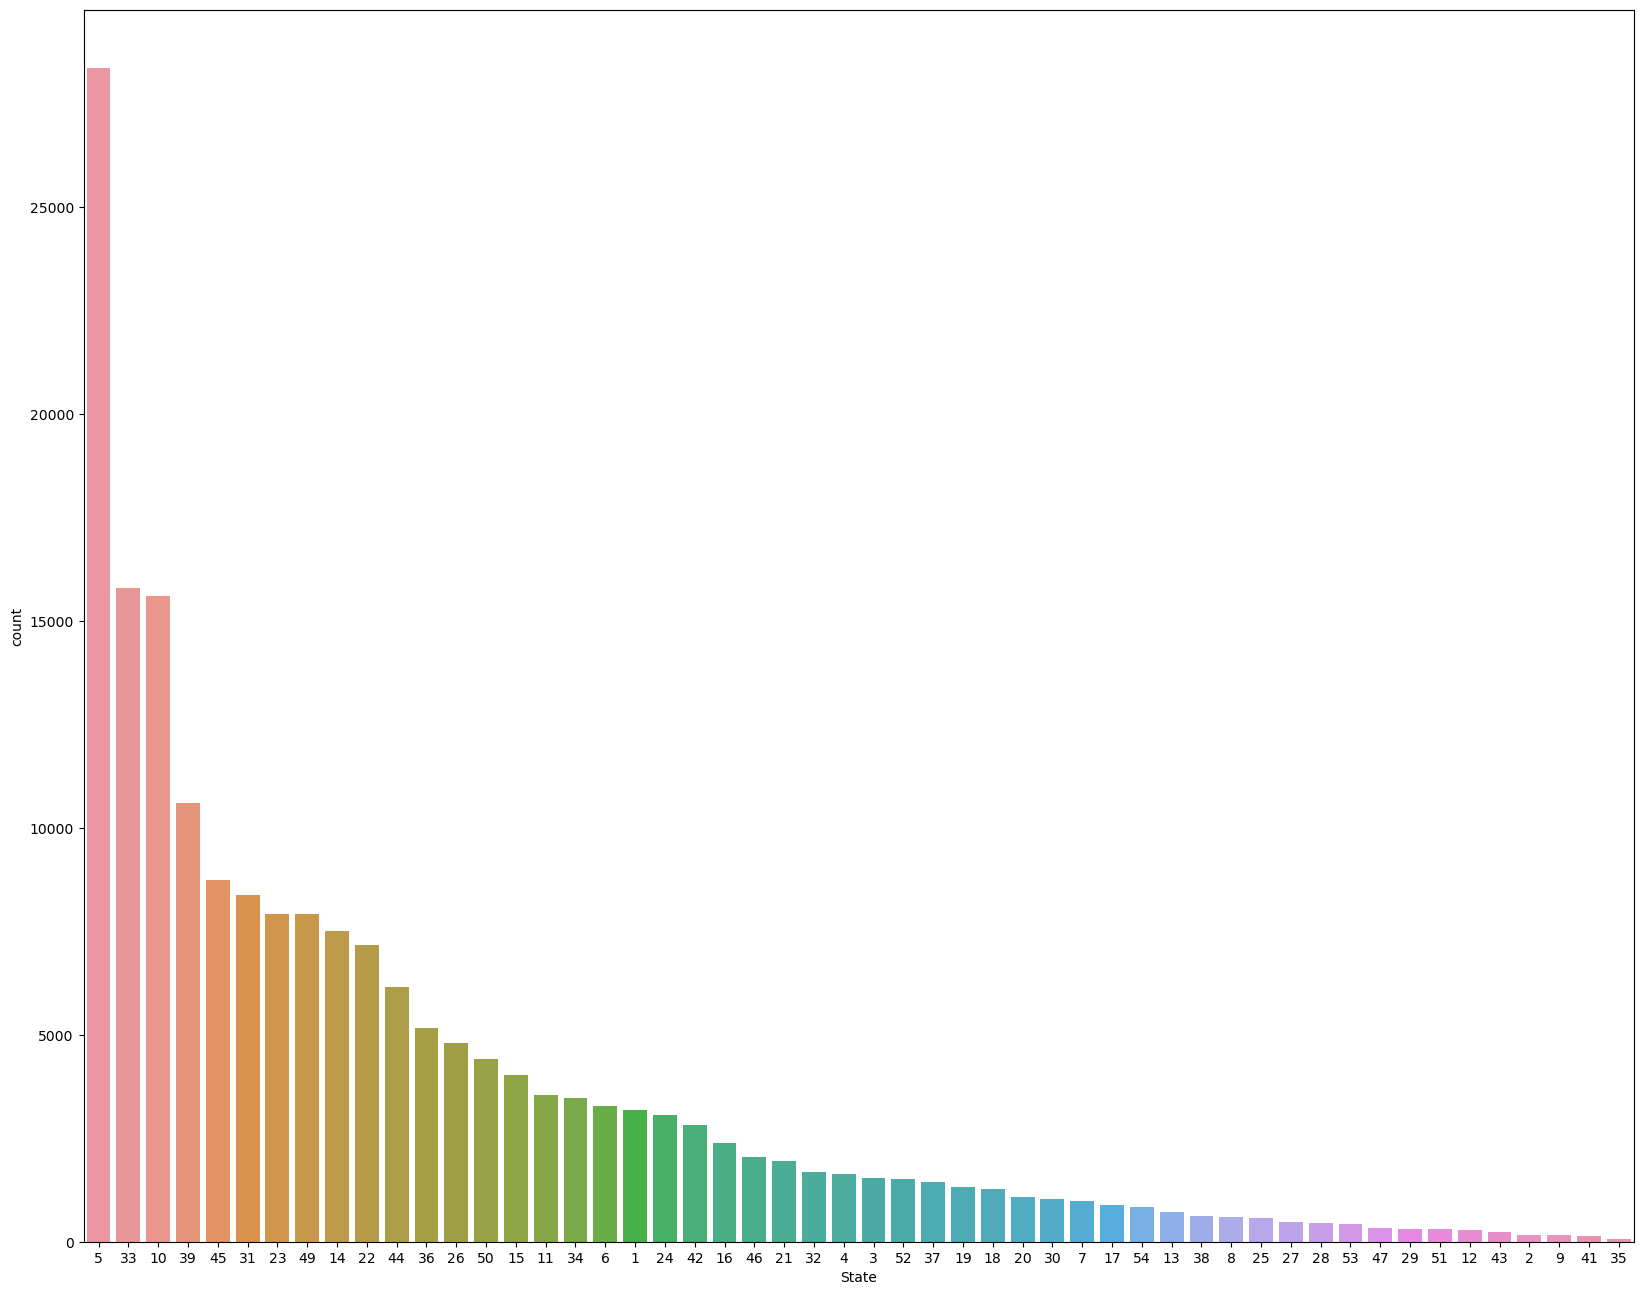

In [31]:
plt.figure(figsize=(20, 16))
sns.countplot(data=train_bene_out_df, x='State', orient='v', order=train_bene_out_df['State'].value_counts().index)

In [32]:
train_bene_out_df['County'].value_counts().head()

200    9491
470    6642
400    5642
590    5413
620    4462
Name: County, dtype: int64

<AxesSubplot:xlabel='County', ylabel='count'>

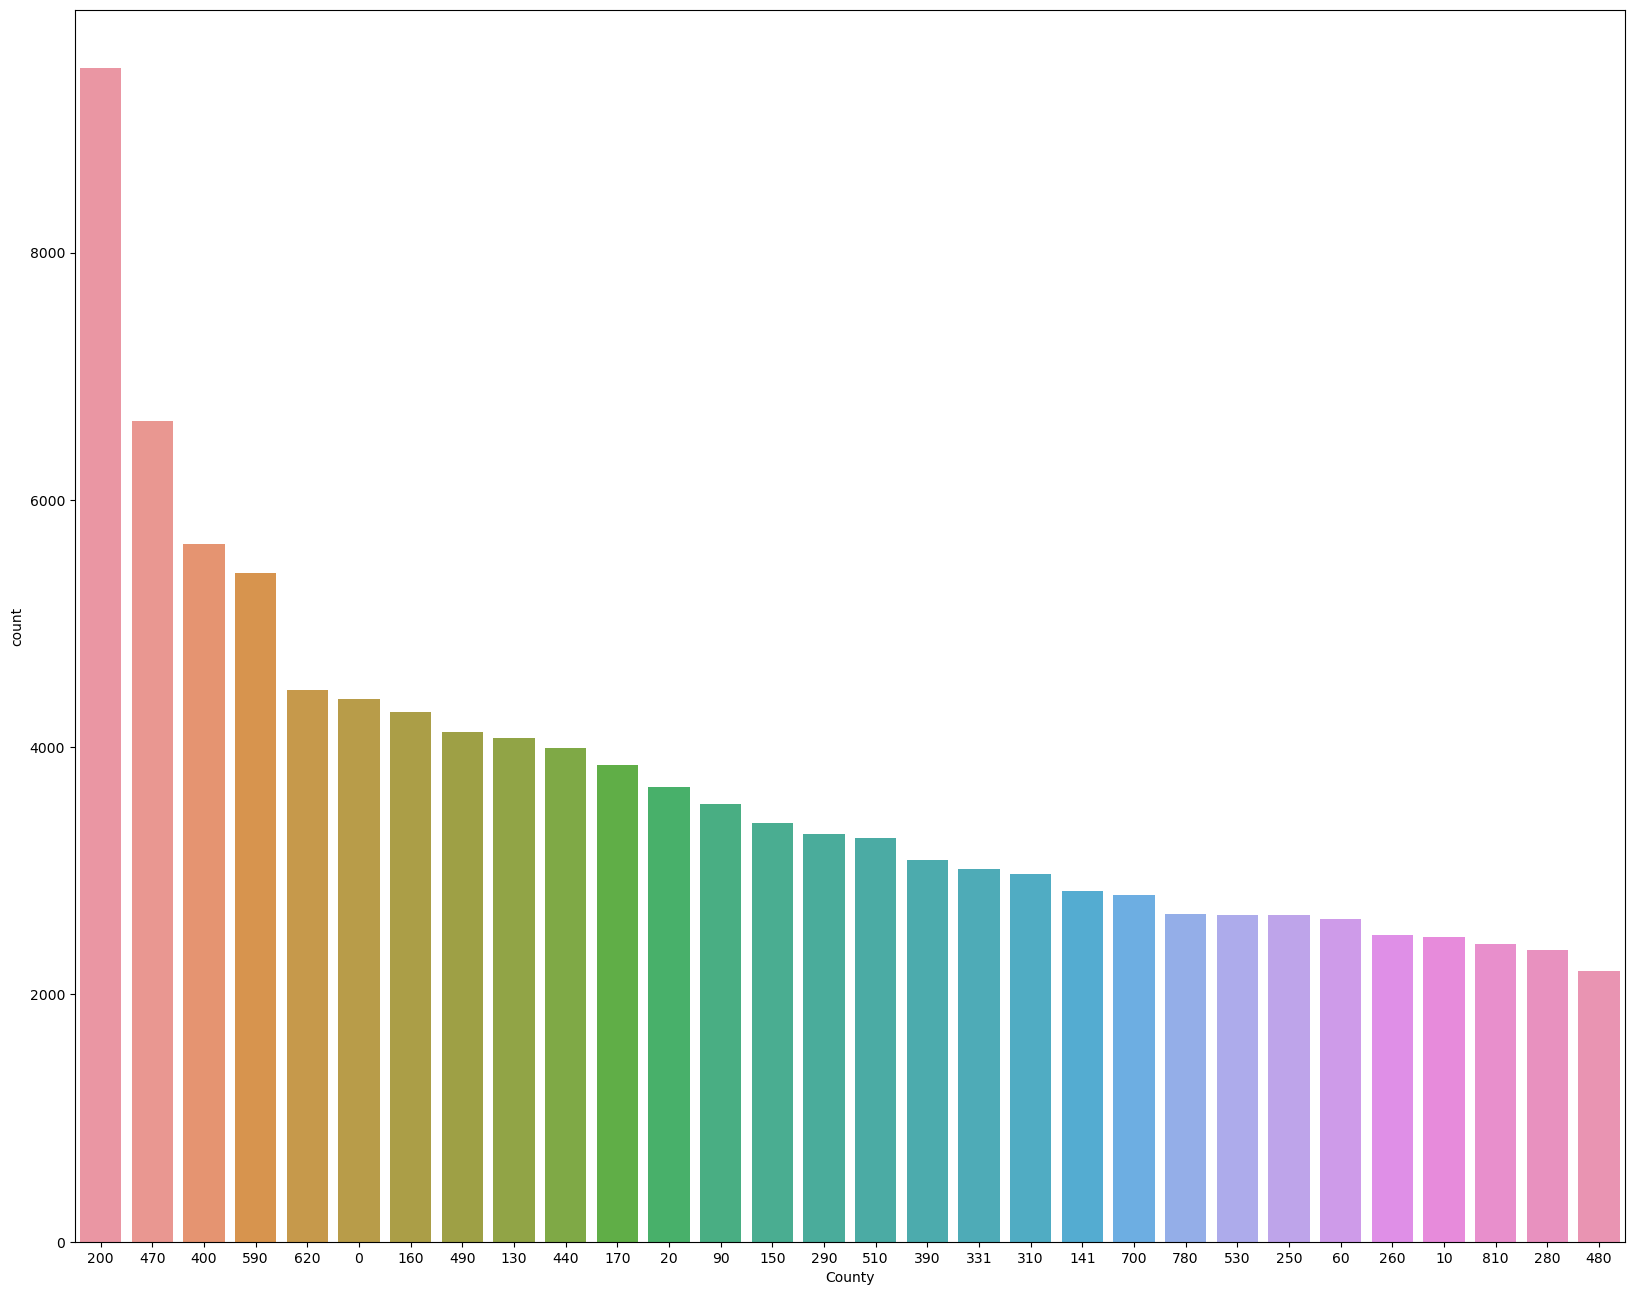

In [33]:
plt.figure(figsize=(20, 16))
sns.countplot(data=train_bene_out_df, x='County', orient='v', order=train_bene_out_df['County'].value_counts().head(30).index)

Observation:

- State coded as 5,33,10 and 39 have most fradulent encounters for Outpatient data .

- County coded as 200,470,400 and 590 have most fradulent encounters for Outpatient data .

# DOB

In [34]:
train_bene_out_df.DOB.isnull().sum()

0

In [35]:
fraud_outpatient_dob = get_month_year(train_bene_out_df.DOB)
fraud_outpatient_dob.head()

,Year,Month
0,1936,9
1,1922,7
2,1922,7
3,1922,7
4,1922,7


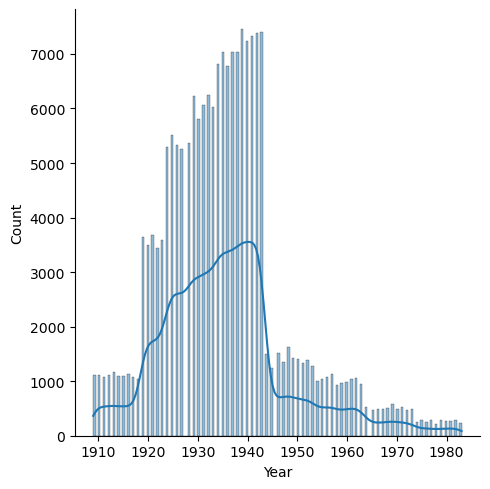

In [36]:
sns.displot(fraud_outpatient_dob, x='Year', y=None, kde=True)

- Most Fradulent ecounters in Outpatient Data is observed for the patients born between 1920 and 1945


# Money Lost

In [37]:
#calculatinng total money lost ib fradulent encounters
total_money_lost = outpatient_fraud_provider_df.InscClaimAmtReimbursed.sum()
print(f"Total money lost: {total_money_lost}")

Total money lost: 54392610


#### Get common columns from inpatient and outpatient

In [23]:
# Get common columns
common_columns = set(train_inpatient_df.columns).intersection(train_outpatient_df.columns)

common_columns = list(common_columns)
print(common_columns)


['OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_5', 'BeneID', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_6', 'InscClaimAmtReimbursed', 'ClmProcedureCode_3', 'ClmDiagnosisCode_1', 'OtherPhysician', 'Provider', 'ClmProcedureCode_4', 'ClaimEndDt', 'ClmDiagnosisCode_3', 'DeductibleAmtPaid', 'ClmDiagnosisCode_8', 'ClmProcedureCode_6', 'ClmDiagnosisCode_2', 'ClaimID', 'ClaimStartDt', 'ClmDiagnosisCode_10', 'AttendingPhysician', 'Admitted?', 'ClmDiagnosisCode_9', 'ClmProcedureCode_5', 'ClmProcedureCode_2', 'ClmProcedureCode_1']


#### Merge the inpatient and outpatient data using the common column.


In [24]:
# Merge the dataframes based on common columns
merged_df = pd.merge(train_inpatient_df, train_outpatient_df, on=common_columns, how='outer')
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [25]:
merged_df.shape

(558211, 31)

In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  558211 non-null  object 
 1   ClaimID                 558211 non-null  object 
 2   ClaimStartDt            558211 non-null  object 
 3   ClaimEndDt              558211 non-null  object 
 4   Provider                558211 non-null  object 
 5   InscClaimAmtReimbursed  558211 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114447 non-null  object 
 8   OtherPhysician          199736 non-null  object 
 9   AdmissionDt             40474 non-null   object 
 10  ClmAdmitDiagnosisCode   145899 non-null  object 
 11  DeductibleAmtPaid       557312 non-null  float64
 12  DischargeDt             40474 non-null   object 
 13  DiagnosisGroupCode      40474 non-null   object 
 14  ClmDiagnosisCode_1  

In [26]:
# Get common columns from beneficiary df and merged (inpatient + outpatient df)

common_columns = set(merged_df.columns).intersection(train_beneficiary_df.columns)
common_columns

{'BeneID'}

In [27]:
# Merge the dataframes based on {'BeneID'}
merged_df = pd.merge(merged_df, train_beneficiary_df, on='BeneID', how='outer')
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,1,2,2,1,1,5000,1068,250,320


In [28]:
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,1,2,2,1,1,5000,1068,250,320


In [29]:
merged_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted?', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression'

In [30]:
# replace all occurrences of the value '2' with 0 

modified_df = merged_df[['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'Gender']].replace(2, 0)

In [29]:
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,1,2,2,1,1,5000,1068,250,320


In [31]:
merged_df.update(modified_df)

In [31]:
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,0,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,0,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,0,0,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,1,0,0,1,1,5000,1068,250,320


In [32]:
merged_df['RenalDiseaseIndicator'].unique()

array(['0', 'Y'], dtype=object)

In [33]:
modified_renal = merged_df['RenalDiseaseIndicator'].replace({'Y': 1, '0': 0}).astype(int)

In [34]:
merged_df.update(modified_renal)

In [35]:
merged_df['RenalDiseaseIndicator'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: RenalDiseaseIndicator, dtype: object

### Merge the above merged data with the train data using the "Provider" column. 

In [36]:
# Merge the dataframes based on {'BeneID'}
merged_df = pd.merge(merged_df, train_df, on='Provider', how='outer')
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,0,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,1,0,0,0,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,1,0,0,0,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,1,1,0,0,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,0,27000,2136,450,160,Yes


In [37]:
merged_df['Target'] = merged_df['PotentialFraud'].map({'Yes': 1, 'No': 0})

In [38]:
merged_df.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,1,1,36000,3204,60,70,Yes,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,1,0,0,0,24000,2136,450,200,Yes,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,0,0,0,19000,1068,100,20,Yes,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,0,0,17000,1068,1050,540,Yes,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,0,27000,2136,450,160,Yes,1
5,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,1,0,0,0,3000,1068,8900,740,Yes,1
6,BENE25016,CLM372477,2009-05-22,2009-05-22,PRV55912,20,PHY416719,NaN,NaN,NaN,...,1,0,0,0,17000,2136,3810,40,Yes,1
7,BENE28966,CLM56700,2009-06-22,2009-06-25,PRV55912,10000,PHY418191,PHY370861,NaN,2009-06-22,...,1,0,0,0,10000,1068,550,190,Yes,1
8,BENE29251,CLM42062,2009-03-11,2009-03-19,PRV55912,18000,PHY318892,NaN,NaN,2009-03-11,...,1,0,1,0,18000,1068,1440,520,Yes,1
9,BENE31905,CLM37729,2009-02-10,2009-03-03,PRV55912,13000,PHY319720,PHY392080,PHY380413,2009-02-10,...,1,1,1,1,51320,6408,770,300,Yes,1


In [38]:
merged_df.shape

(558211, 57)

In [39]:
print(merged_df['PotentialFraud'].value_counts())

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

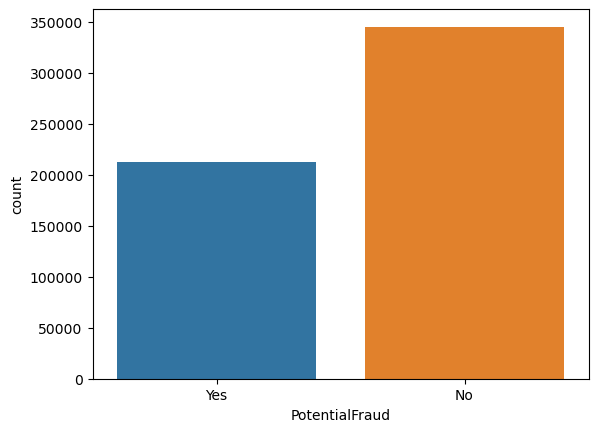

In [40]:
sns.countplot(data=merged_df, x='PotentialFraud')

In [41]:
merged_df['PotentialFraud'].isnull().sum()

0

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Check for null values
null_values = merged_df.isnull()

# null_values

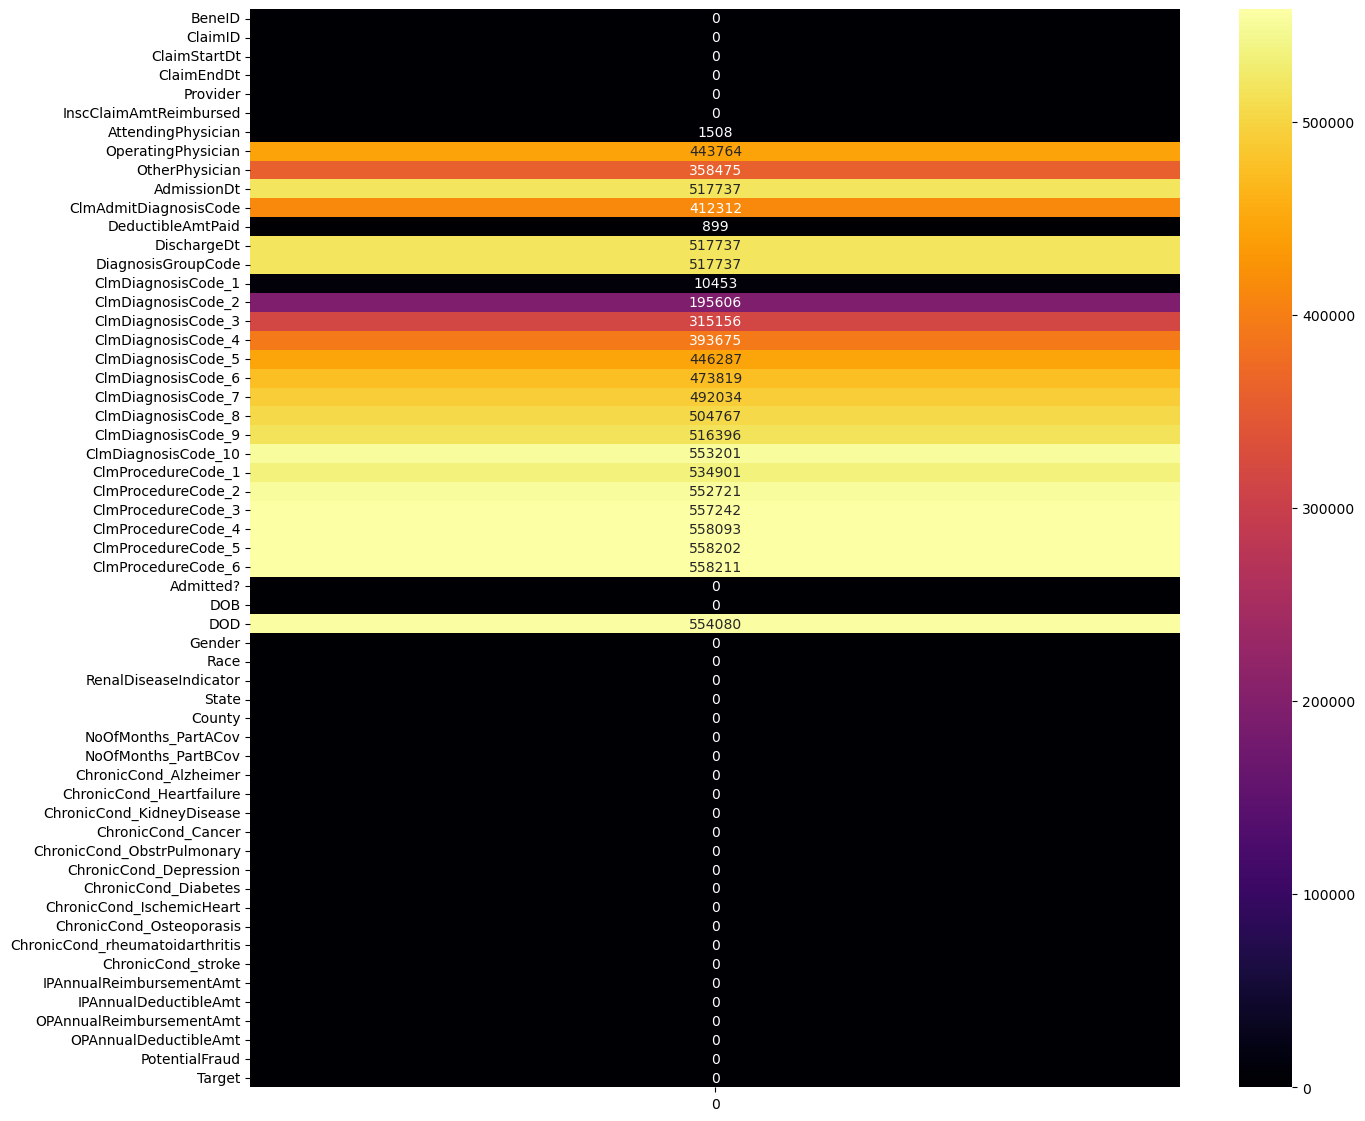

In [45]:
# # Calculate the correlation matrix
# corr_matrix = null_values.corr()

# # Reshape the correlation matrix for the condition
# condition = np.squeeze(np.array(corr_matrix))
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 14))
# Create the heatmap
sns.heatmap(pd.DataFrame(null_values.sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True, ax=ax)

plt.show()


In [59]:
# Get data with only "YES" as Potential Fraud

In [43]:
only_fraud_data = merged_df[merged_df['PotentialFraud'] == 'Yes']
only_fraud_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,1,1,36000,3204,60,70,Yes,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,1,0,0,0,24000,2136,450,200,Yes,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,0,0,0,19000,1068,100,20,Yes,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,0,0,17000,1068,1050,540,Yes,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,0,27000,2136,450,160,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556651,BENE110349,CLM598721,2009-09-25,2009-09-25,PRV54540,40,PHY338280,NaN,PHY371359,NaN,...,1,0,1,0,10000,1068,560,290,Yes,1
556652,BENE123756,CLM730187,2009-12-15,2009-12-15,PRV54540,2700,PHY345759,NaN,PHY345759,NaN,...,1,0,1,0,0,0,4020,40,Yes,1
556653,BENE133688,CLM395776,2009-06-03,2009-06-03,PRV54540,3300,PHY392806,NaN,PHY401262,NaN,...,1,0,0,0,0,0,9650,2190,Yes,1
556654,BENE138329,CLM152734,2009-01-22,2009-01-22,PRV54540,100,PHY427294,PHY427294,NaN,NaN,...,0,0,0,0,0,0,220,200,Yes,1


In [44]:
only_fraud_data.shape

(212796, 57)

#### Add Is dead column

### By using the ClaimStartDt and the patient's date of birth (DOB), you can estimate their age at the time of submitting the claim.

In [48]:
merged_df.DOD.isnull().sum()

554080

In [49]:
merged_df.DOD.notnull().sum()

4131

In [50]:
merged_df.DOD

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
558206    NaN
558207    NaN
558208    NaN
558209    NaN
558210    NaN
Name: DOD, Length: 558211, dtype: object

In [45]:
# Create a new column 'HasDOD' with default value 0

merged_df['IsDead'] = 0

In [46]:
merged_df['IsDead'] = np.where(merged_df['DOD'].notnull(), 1, 0)


In [47]:
merged_df.IsDead.value_counts()

0    554080
1      4131
Name: IsDead, dtype: int64

In [54]:
merged_df.head(20)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,0,1,1,36000,3204,60,70,Yes,1,0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,0,0,24000,2136,450,200,Yes,1,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,0,0,19000,1068,100,20,Yes,1,0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,0,0,17000,1068,1050,540,Yes,1,0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,0,27000,2136,450,160,Yes,1,0
5,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,0,0,0,3000,1068,8900,740,Yes,1,0
6,BENE25016,CLM372477,2009-05-22,2009-05-22,PRV55912,20,PHY416719,NaN,NaN,NaN,...,0,0,0,17000,2136,3810,40,Yes,1,0
7,BENE28966,CLM56700,2009-06-22,2009-06-25,PRV55912,10000,PHY418191,PHY370861,NaN,2009-06-22,...,0,0,0,10000,1068,550,190,Yes,1,0
8,BENE29251,CLM42062,2009-03-11,2009-03-19,PRV55912,18000,PHY318892,NaN,NaN,2009-03-11,...,0,1,0,18000,1068,1440,520,Yes,1,0
9,BENE31905,CLM37729,2009-02-10,2009-03-03,PRV55912,13000,PHY319720,PHY392080,PHY380413,2009-02-10,...,1,1,1,51320,6408,770,300,Yes,1,0


In [55]:
merged_df[['ClaimStartDt', 'DOB']]

,ClaimStartDt,DOB
0,2009-04-12,1943-01-01
1,2009-09-06,1932-05-01
2,2009-01-20,1913-12-01
3,2009-10-17,1922-10-01
4,2009-10-25,1930-07-01
...,...,...
558206,2009-06-02,1925-01-01
558207,2009-02-08,1927-05-01
558208,2009-07-09,1946-06-01
558209,2009-04-16,1924-08-01


In [48]:
merged_df['ClaimStartDt'] = pd.to_datetime(merged_df['ClaimStartDt'])

In [49]:
merged_df['DOB'] = pd.to_datetime(merged_df['DOB'])

In [50]:
merged_df[['ClaimStartDt', 'DOB']].head()

,ClaimStartDt,DOB
0,2009-04-12,1943-01-01
1,2009-09-06,1932-05-01
2,2009-01-20,1913-12-01
3,2009-10-17,1922-10-01
4,2009-10-25,1930-07-01


In [51]:
merged_df[['ClaimStartDt', 'DOB']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ClaimStartDt  558211 non-null  datetime64[ns]
 1   DOB           558211 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 12.8 MB


In [52]:
merged_df['Age'] = (merged_df['ClaimStartDt'] - merged_df['DOB']).dt.days / 365

In [53]:
merged_df.Age.info()

<class 'pandas.core.series.Series'>
Int64Index: 558211 entries, 0 to 558210
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
558211 non-null  float64
dtypes: float64(1)
memory usage: 8.5 MB


In [75]:
merged_df.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,Yes,1,0,66.323288
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,0,24000,2136,450,200,Yes,1,0,77.402740
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,0,19000,1068,100,20,Yes,1,0,95.202740
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,0,17000,1068,1050,540,Yes,1,0,87.104110
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,0,27000,2136,450,160,Yes,1,0,79.372603
5,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,0,0,3000,1068,8900,740,Yes,1,0,83.410959
6,BENE25016,CLM372477,2009-05-22,2009-05-22,PRV55912,20,PHY416719,NaN,NaN,NaN,...,0,0,17000,2136,3810,40,Yes,1,0,62.183562
7,BENE28966,CLM56700,2009-06-22,2009-06-25,PRV55912,10000,PHY418191,PHY370861,NaN,2009-06-22,...,0,0,10000,1068,550,190,Yes,1,0,75.438356
8,BENE29251,CLM42062,2009-03-11,2009-03-19,PRV55912,18000,PHY318892,NaN,NaN,2009-03-11,...,1,0,18000,1068,1440,520,Yes,1,0,49.476712
9,BENE31905,CLM37729,2009-02-10,2009-03-03,PRV55912,13000,PHY319720,PHY392080,PHY380413,2009-02-10,...,1,1,51320,6408,770,300,Yes,1,0,75.246575


In [54]:
# Round off the age to the nearest whole number and convert it to an integer
merged_df['Age'] = merged_df['Age'].round().astype(int)
merged_df.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,Yes,1,0,66
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,0,24000,2136,450,200,Yes,1,0,77
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,0,19000,1068,100,20,Yes,1,0,95
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,0,17000,1068,1050,540,Yes,1,0,87
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,0,27000,2136,450,160,Yes,1,0,79
5,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,0,0,3000,1068,8900,740,Yes,1,0,83
6,BENE25016,CLM372477,2009-05-22,2009-05-22,PRV55912,20,PHY416719,NaN,NaN,NaN,...,0,0,17000,2136,3810,40,Yes,1,0,62
7,BENE28966,CLM56700,2009-06-22,2009-06-25,PRV55912,10000,PHY418191,PHY370861,NaN,2009-06-22,...,0,0,10000,1068,550,190,Yes,1,0,75
8,BENE29251,CLM42062,2009-03-11,2009-03-19,PRV55912,18000,PHY318892,NaN,NaN,2009-03-11,...,1,0,18000,1068,1440,520,Yes,1,0,49
9,BENE31905,CLM37729,2009-02-10,2009-03-03,PRV55912,13000,PHY319720,PHY392080,PHY380413,2009-02-10,...,1,1,51320,6408,770,300,Yes,1,0,75


<AxesSubplot:xlabel='Age', ylabel='Count'>

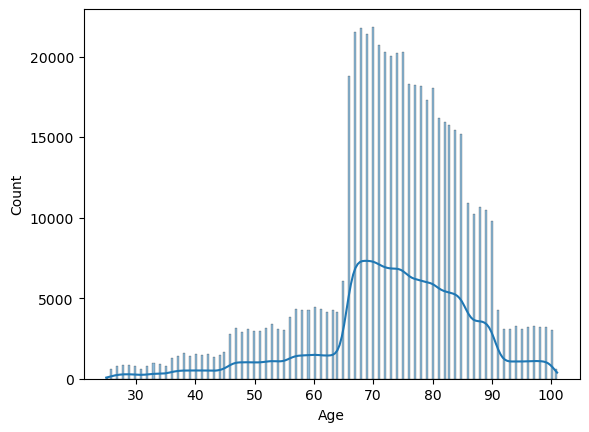

In [78]:
# Create a histogram using Seaborn
sns.histplot(data=merged_df, x='Age', kde=True)

we see increasing trend in the potential fraud cases for patients age > 65 Also most of the patient who applied for claim fall in this age range only

<AxesSubplot:xlabel='Race', ylabel='count'>

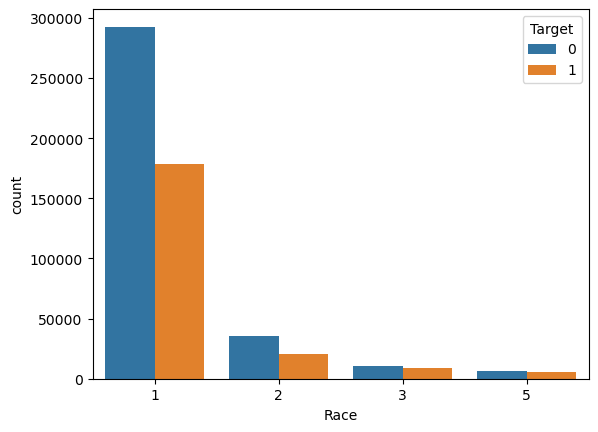

In [79]:
# Create a histogram using Seaborn
sns.countplot(data=merged_df, x='Race',hue='Target')

It is very important to see that most fradulent cases is with patients belonging to a perticular Race and that is labelled as 1

# Drop Column

In [55]:
merged_df = merged_df.drop('DOB', axis=1)
merged_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,36000,3204,60,70,Yes,1,0,66
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,0,24000,2136,450,200,Yes,1,0,77
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,0,19000,1068,100,20,Yes,1,0,95
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,0,17000,1068,1050,540,Yes,1,0,87
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,0,27000,2136,450,160,Yes,1,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaN,...,0,0,0,0,890,120,No,0,0,84
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaN,...,1,0,0,0,4400,220,No,0,0,82
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaN,...,0,0,0,0,14240,2810,No,0,0,63
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaN,...,1,0,0,0,640,350,No,0,0,85


In [56]:
merged_df = merged_df.drop('DOD', axis=1)

### calculating number of days a patinet was admitted in the hospital and then removing admit and discharge date
### outpatients dont get admitted so we keep 0 for them

In [57]:
merged_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted?', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond

In [80]:
merged_df['AdmissionDt'].info()

<class 'pandas.core.series.Series'>
Int64Index: 558211 entries, 0 to 558210
Series name: AdmissionDt
Non-Null Count  Dtype 
--------------  ----- 
40474 non-null  object
dtypes: object(1)
memory usage: 8.5+ MB


In [58]:
merged_df['AdmissionDt'] = pd.to_datetime(merged_df['AdmissionDt'])
merged_df['DischargeDt'] = pd.to_datetime(merged_df['DischargeDt'])

In [66]:
merged_df[['AdmissionDt', 'DischargeDt']]

,AdmissionDt,DischargeDt
0,2009-04-12,2009-04-18
1,NaT,NaT
2,2009-01-20,2009-02-01
3,2009-10-17,2009-11-04
4,2009-10-25,2009-10-29
...,...,...
558206,NaT,NaT
558207,NaT,NaT
558208,NaT,NaT
558209,NaT,NaT


In [83]:
merged_df[['AdmissionDt', 'DischargeDt']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   AdmissionDt  40474 non-null  datetime64[ns]
 1   DischargeDt  40474 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 12.8 MB


In [59]:
merged_df['No_admission_days'] = ((merged_df['DischargeDt'] - merged_df['AdmissionDt']).dt.days + 1)
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age,No_admission_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,36000,3204,60,70,Yes,1,0,66,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,0,24000,2136,450,200,Yes,1,0,77,NaN
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,19000,1068,100,20,Yes,1,0,95,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,17000,1068,1050,540,Yes,1,0,87,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,0,27000,2136,450,160,Yes,1,0,79,5.0


In [60]:
merged_df[['Admitted?', 'No_admission_days']]

,Admitted?,No_admission_days
0,1,7.0
1,0,NaN
2,1,13.0
3,1,19.0
4,1,5.0
...,...,...
558206,0,NaN
558207,0,NaN
558208,0,NaN
558209,0,NaN


In [61]:
# Set No_admission_days to 0 where Admitted is 0
merged_df.loc[merged_df['Admitted?'] == 0, 'No_admission_days'] = 0

In [70]:
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age,No_admission_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,36000,3204,60,70,Yes,1,0,66,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,...,0,24000,2136,450,200,Yes,1,0,77,0.0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,19000,1068,100,20,Yes,1,0,95,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,17000,1068,1050,540,Yes,1,0,87,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,0,27000,2136,450,160,Yes,1,0,79,5.0


In [62]:
merged_df.drop('DischargeDt', axis=1, inplace=True)
merged_df.drop('AdmissionDt', axis=1, inplace=True)

In [90]:
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age,No_admission_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,1,36000,3204,60,70,Yes,1,0,66,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,24000,2136,450,200,Yes,1,0,77,0.0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,0,19000,1068,100,20,Yes,1,0,95,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,0,17000,1068,1050,540,Yes,1,0,87,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,0,27000,2136,450,160,Yes,1,0,79,5.0


In [63]:
merged_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Admitted?', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Ische

In [64]:
# Check for null values
null_values = merged_df.isnull()
null_values

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age,No_admission_days
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
558207,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
558208,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
558209,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


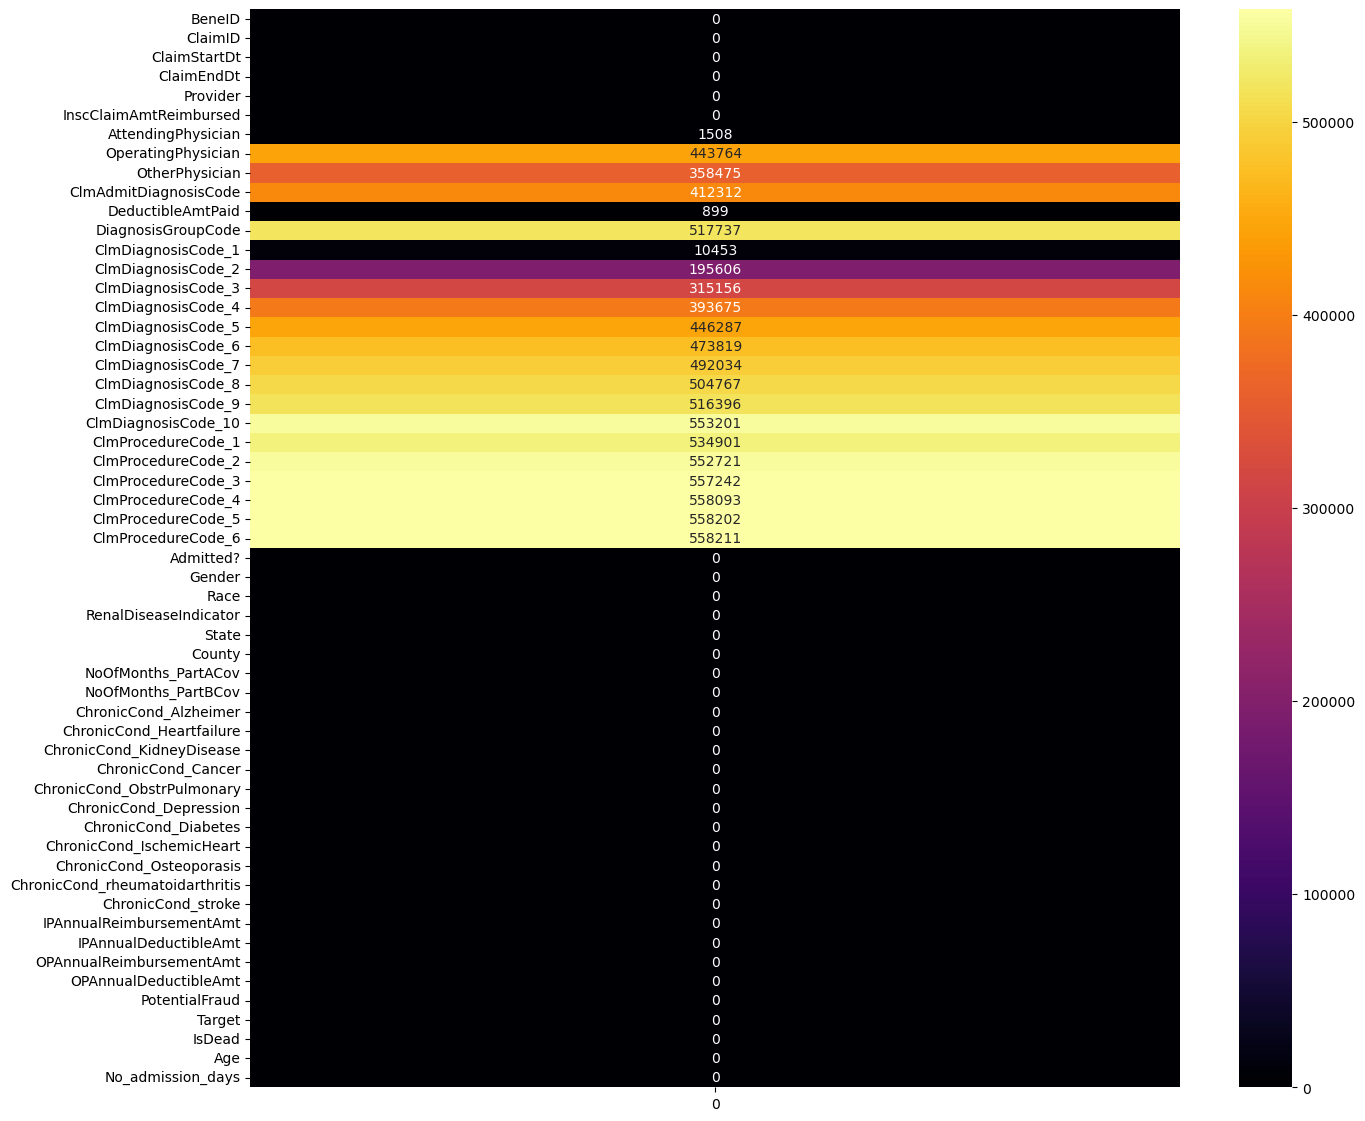

In [75]:
# # Calculate the correlation matrix
# corr_matrix = null_values.corr()

# # Reshape the correlation matrix for the condition
# condition = np.squeeze(np.array(corr_matrix))
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 14))
# Create the heatmap
sns.heatmap(pd.DataFrame(null_values.sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True, ax=ax)

plt.show()


In [65]:
# Set DeductibleAmtPaid to 0 where DeductibleAmtPaid is null

merged_df.loc[merged_df['DeductibleAmtPaid'].isnull(), 'DeductibleAmtPaid'] = 0

In [104]:
merged_df['DeductibleAmtPaid'].info()

<class 'pandas.core.series.Series'>
Int64Index: 558211 entries, 0 to 558210
Series name: DeductibleAmtPaid
Non-Null Count   Dtype  
--------------   -----  
558211 non-null  float64
dtypes: float64(1)
memory usage: 8.5 MB


In [77]:
merged_df['DeductibleAmtPaid'].isnull().sum()

0

In [105]:
merged_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Admitted?', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Ische

In [124]:
merged_df['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

In [115]:
potential_fraud_df = merged_df.loc[merged_df['PotentialFraud'] == 'Yes']

In [80]:
common_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']
common_columns

['ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10']

In [139]:
potential_fraud_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Target,IsDead,Age,No_admission_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,1,36000,3204,60,70,Yes,1,0,66,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,24000,2136,450,200,Yes,1,0,77,0.0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,0,19000,1068,100,20,Yes,1,0,95,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,0,17000,1068,1050,540,Yes,1,0,87,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,0,27000,2136,450,160,Yes,1,0,79,5.0


In [140]:
potential_fraud_combined_df = pd.DataFrame()

In [141]:
potential_fraud_combined_df = pd.append([potential_fraud_df['ClmDiagnosisCode_1'], 
                                            potential_fraud_df['ClmDiagnosisCode_2'], 
                                            potential_fraud_df['ClmDiagnosisCode_3'], 
                                            potential_fraud_df['ClmDiagnosisCode_4'], 
                                            potential_fraud_df['ClmDiagnosisCode_5'],
                                            potential_fraud_df['ClmDiagnosisCode_6'], 
                                            potential_fraud_df['ClmDiagnosisCode_7'], 
                                            potential_fraud_df['ClmDiagnosisCode_8'], 
                                            potential_fraud_df['ClmDiagnosisCode_9'], 
                                            potential_fraud_df['ClmDiagnosisCode_10']])

potential_fraud_combined_df = potential_fraud_combined_df.dropna()

AttributeError: module 'pandas' has no attribute 'append'

In [142]:
potential_fraud_combined_df['ProcedureCode'] = pd.concat([
    potential_fraud_df["ClmProcedureCode_1"],
    potential_fraud_df["ClmProcedureCode_2"],
    potential_fraud_df["ClmProcedureCode_3"],
    potential_fraud_df["ClmProcedureCode_4"],
    potential_fraud_df["ClmProcedureCode_5"],
    potential_fraud_df["ClmProcedureCode_6"]
], axis=0, sort=True).dropna()


In [143]:
potential_fraud_combined_df.ProcedureCode

2         7769.0
3         9338.0
4         8154.0
5         8543.0
7         3327.0
           ...  
124158    4139.0
216983    4139.0
225062    9971.0
271612    2724.0
418927    9982.0
Name: ProcedureCode, Length: 17415, dtype: float64

<AxesSubplot:title={'center':'Top 10 sucpicious procedure'}>

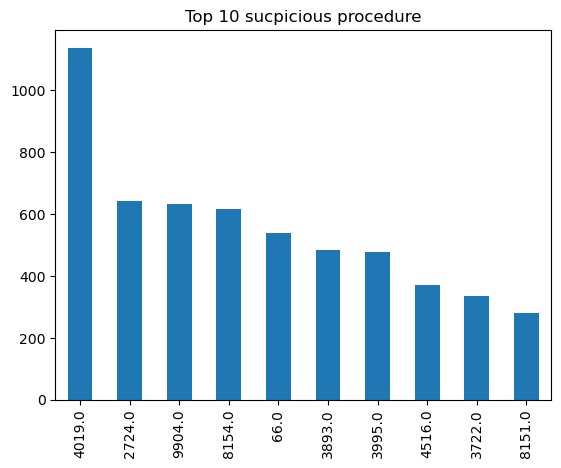

In [144]:
potential_fraud_combined_df.ProcedureCode.value_counts().head(10).plot(kind = 'bar' , title ='Top 10 sucpicious procedure')

In [145]:
potential_fraud_combined_df = pd.DataFrame(columns = ['DiagnosisCode'])
potential_fraud_combined_df['DiagnosisCode'] = pd.concat([potential_fraud_df["ClmDiagnosisCode_1"], 
                                           potential_fraud_df["ClmDiagnosisCode_2"], 
                                           potential_fraud_df["ClmDiagnosisCode_3"], 
                                           potential_fraud_df["ClmDiagnosisCode_4"],
                                           potential_fraud_df["ClmDiagnosisCode_5"], 
                                           potential_fraud_df["ClmDiagnosisCode_6"],
                                           potential_fraud_df["ClmDiagnosisCode_7"],
                                           potential_fraud_df["ClmDiagnosisCode_8"],
                                           potential_fraud_df["ClmDiagnosisCode_9"],
                                           potential_fraud_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()


<AxesSubplot:title={'center':'Top 10 sucpicious Diagnosis'}>

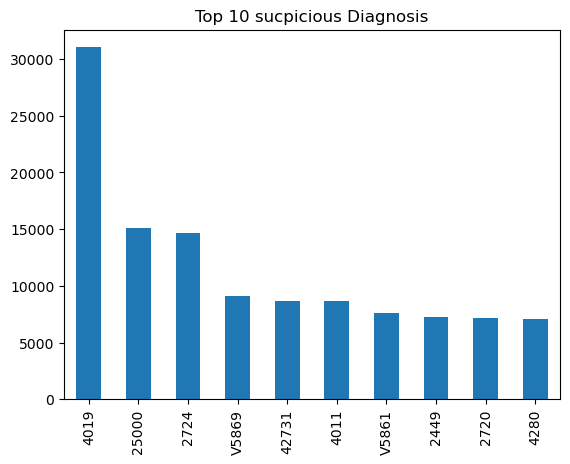

In [147]:
potential_fraud_combined_df.DiagnosisCode.value_counts().head(10).plot(kind = 'bar' , title ='Top 10 sucpicious Diagnosis')

In [102]:
diagnosis_procedure_column = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
                  'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                  'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                  'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
                  'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                  'ClmProcedureCode_5', 'ClmProcedureCode_6']



In [125]:
merged_df[diagnosis_procedure_column] = merged_df[diagnosis_procedure_column].fillna(0)

In [127]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmAdmitDiagnosisCode            558211 non-null  object        
 10  DeductibleAmtPaid                558211 non-

In [128]:
def encoded_cat(dataset, feature_to_encode='', col_list=[]):
    encoded_columns = dataset[col_list]  # Select only the specified columns from the dataset
    binary_encoding = (encoded_columns == feature_to_encode).astype(int)  # Perform element-wise comparison and cast to integer (1 for True, 0 for False)
    column_sums = binary_encoding.sum(axis=1)  # Sum the binary encodings across columns
    
    return np.array(column_sums)

In [ ]:
merged_df_potential = pd.merge(potential_fraud_df, potential_fraud_df, on=common_columns, how='inner')

In [129]:
procedure_col = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']
   
diagnosis_col = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']

In [132]:
#top 5 procedure
# 4019.0, 2724.0, 9904.0, 8154.0, 66.0
merged_df['pr_4019'] = encoded_cat(merged_df,'4019.0',procedure_col)
merged_df['pr_2724'] = encoded_cat(merged_df,'2724.0',procedure_col)
merged_df['pr_9904'] = encoded_cat(merged_df,'9904.0',procedure_col)
merged_df['pr_8154'] = encoded_cat(merged_df,'8154.0',procedure_col)
merged_df['pr_66'] =   encoded_cat(merged_df,'66.0',procedure_col)

In [133]:
#top 5 diagnosis 
#4019,25000,2724,V5869,42731
merged_df['di_4019'] = encoded_cat(merged_df,'4019',diagnosis_col)
merged_df['di_25000'] = encoded_cat(merged_df,'25000',diagnosis_col)
merged_df['di_2724'] = encoded_cat(merged_df,'2724',diagnosis_col)
merged_df['di_V5869'] = encoded_cat(merged_df,'V5869',diagnosis_col)
merged_df['di_42731'] =   encoded_cat(merged_df,'42731',diagnosis_col)

In [134]:
# Diag_proce_col` is a list of column names to modify

merged_df[diagnosis_procedure_column] = merged_df[diagnosis_procedure_column].astype(bool).astype(int)

In [135]:
merged_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,pr_4019,pr_2724,pr_9904,pr_8154,pr_66,di_4019,di_25000,di_2724,di_V5869,di_42731
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,1,...,0,0,0,0,0,1,0,1,0,0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,1,...,0,0,0,0,0,0,0,0,0,0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,1,...,0,0,0,0,0,1,0,0,0,0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,1,...,0,0,0,0,0,1,0,0,0,0


In [154]:
merged_df[diagnosis_procedure_column].head()

,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0
1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0
2,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0


In [156]:
merged_df[diagnosis_col].sum()

ClmDiagnosisCode_1     547758
ClmDiagnosisCode_2     362605
ClmDiagnosisCode_3     243055
ClmDiagnosisCode_4     164536
ClmDiagnosisCode_5     111924
ClmDiagnosisCode_6      84392
ClmDiagnosisCode_7      66177
ClmDiagnosisCode_8      53444
ClmDiagnosisCode_9      41815
ClmDiagnosisCode_10      5010
dtype: int64

In [158]:
merged_df[diagnosis_col].sum(axis=1)

0         9
1         9
2         9
3         9
4         7
         ..
558206    3
558207    1
558208    2
558209    1
558210    4
Length: 558211, dtype: int64

In [159]:
#adding column total_num_diag
merged_df['total_num_diag'] = merged_df[diagnosis_col].sum(axis=1)

In [ ]:
#adding column total_num_proce
merged_df['total_num_procedure'] = merged_df[procedure_col].sum(axis=1)

# Alternate

In [148]:
# Create a separate DataFrame for each procedure code column and filter out the missing values (NaN):

procedure_code_1 = potential_fraud_df[["ClmProcedureCode_1"]].dropna()
procedure_code_1

,ClmProcedureCode_1
2,7769.0
3,9338.0
4,8154.0
5,8543.0
7,3327.0
...,...
542081,3893.0
542082,3893.0
546136,5122.0
546137,80.0


In [ ]:
procedure_code_2 = potential_fraud_df[["ClmProcedureCode_2"]].dropna()
procedure_code_3 = potential_fraud_df[["ClmProcedureCode_3"]].dropna()
procedure_code_4 = potential_fraud_df[["ClmProcedureCode_4"]].dropna()
procedure_code_5 = potential_fraud_df[["ClmProcedureCode_5"]].dropna()
procedure_code_6 = potential_fraud_df[["ClmProcedureCode_6"]].dropna()

In [149]:
# Use pd.merge() with the how parameter set to "outer" to merge the DataFrames 
# on a common index (or column if available):
non_missing_codes = pd.merge(procedure_code_1, procedure_code_2, how="outer")
non_missing_codes = pd.merge(non_missing_codes, procedure_code_3, how="outer")
non_missing_codes = pd.merge(non_missing_codes, procedure_code_4, how="outer")
non_missing_codes = pd.merge(non_missing_codes, procedure_code_5, how="outer")
non_missing_codes = pd.merge(non_missing_codes, procedure_code_6, how="outer")


# Merge the beneficiary data with both the inpatient and outpatient data using the "BeneID" column.

In [2]:
train_outpatient_df.shape

NameError: name 'train_outpatient_df' is not defined

In [76]:
train_inpatient_df.shape

NameError: name 'train_inpatient_df' is not defined

In [61]:
train_beneficiary_df.shape

(138556, 25)

##### `how="inner"` will keep only the rows where the "BeneID" exists in all three datasets, effectively merging the datasets based on the common identifier.

In [66]:
# Merge beneficiary data with inpatient data
merged_data = pd.merge(train_beneficiary_df, train_inpatient_df, on="BeneID", how="inner")
merged_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [67]:
merged_data.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'Cl

In [80]:
# Merge the merged data with outpatient data
merged_data = pd.merge(merged_data, train_outpatient_df, on=["BeneID", "Provider"], suffixes=('_inpatient', '_outpatient'))
merged_data.head()

KeyError: 'Provider'

In [69]:
merged_data.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID_inpatient', 'ClaimStartDt_inpatient',
       'ClaimEndDt_inpatient', 'Provider_inpatient',
       'InscClaimAmtReimbursed_inpatient', 'AttendingPhysician_inpatient',
       'OperatingPhysician_inpatient', 'OtherPhysician_inpatient',
       'AdmissionDt', 'ClmAdmitDiagnosisCode_inpatient',
       'DeductibleAmtPaid_inpatient', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosis

In [79]:
merged_data[['Provider_inpatient', 'Provider_outpatient']]

,Provider_inpatient,Provider_outpatient
0,PRV52405,PRV52314
1,PRV52405,PRV51012
2,PRV52405,PRV51063
3,PRV56614,PRV56835
4,PRV54986,PRV54786
...,...,...
173577,PRV56575,PRV56758
173578,PRV56575,PRV56575
173579,PRV54765,PRV54765
173580,PRV54765,PRV54778


In [77]:
# Merge the dataframes based on the "Provider" column
merged_data = pd.merge(merged_data, train_df, left_on=["Provider_inpatient", "Provider_outpatient"], right_on="Provider", how="inner")

# Drop the duplicate "Provider" column
merged_data.drop("Provider", axis=1, inplace=True)

merged_data.head()

ValueError: len(right_on) must equal len(left_on)